# 3- Review Sentiment Prediction:
#### Amin Khoeini

***


In this step, diffrent NLP model will train to see which one has the best performance for the sentiment prediction of the reviews.

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV,cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import pow, sqrt
import nltk
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,SnowballStemmer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn import metrics

import pickle

In [13]:
#loading the data
review_db = pd.read_csv('/Users/Amin/Documents/GitHub/Review-Sentiment-Analysis-with-Recommendation-System/data/review_db.csv')

In [14]:
review_db.head()

,reviewer,movie,rating,review_date,review_detail,lable,imdb_id
0,OriginalMovieBuff21,Kill Bill: Vol. 2,8.0,2005-07-24,after seeing tarantino's kill bill vol: 1 i go...,LOVE IT,tt0378194
1,Bogmeister,Kill Bill: Vol. 2,9.0,2005-08-15,the 2nd half of tarantino's tale of bloody rev...,LOVE IT,tt0378194
2,departed07,Kill Bill: Vol. 2,10.0,2005-08-26,the bride is back and ready to kick ass in thi...,LOVE IT,tt0378194
3,Angeneer,Kill Bill: Vol. 2,10.0,2005-09-08,i'm very happy to admit that tarantino proved ...,LOVE IT,tt0378194
4,LoneWolfAndCub,Kill Bill: Vol. 2,10.0,2005-09-07,kill bill volume 2 (directed by quentin tarant...,LOVE IT,tt0378194


In [15]:
review_db.dtypes

reviewer          object
movie             object
rating           float64
review_date       object
review_detail     object
lable             object
imdb_id           object
dtype: object

In [16]:
#Creating a unique ID for each user_name.
review_db['User_ID'] = review_db.reviewer.astype('category').cat.codes

In [17]:
review_db.User_ID.unique()

array([2401,  381, 5284, ..., 9152, 8056, 8807], dtype=int16)

### Processing the Review:

In [18]:
# Removing the punctuation from the review
def punc_clean(text):
    import string as st
    a=[w for w in text if w not in st.punctuation]
    return ''.join(a)

In [19]:
# Apply the punc_clean function to the review
review_db['review_clean'] = review_db['review_detail'].apply(punc_clean)

In [20]:
# Remove the stop words from the review
def remove_stopword(text):
    stopword=nltk.corpus.stopwords.words('english')
    stopword.remove('not')
    return ' '.join(w for w in nltk.word_tokenize(text) if w not in stopword)

In [21]:
# Apply the remove_stopword to the review
review_db['review_clean'] = review_db['review_clean'].apply(remove_stopword)

In [5]:
# Remove any only numeric string from the review
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
words = set(nltk.corpus.words.words())
def clean(text):
    return ' '.join([w for w in w_tokenizer.tokenize(text) if w.isalpha()])

In [ ]:
# Apply remove numeric function to review 
review_db['review_clean'] = review_db['review_processed'].apply(clean)

In [22]:
# Lemmatize the review by using sklearn WordNetLemmatizer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)])

In [23]:
# Apply the Lemmatizer to review
review_db['review_clean'] = review_db['review_clean'].apply(lemmatize_text)

In [14]:
# Stemme the review using Sklearn SnowballStemmer and only chose english words
stemmer = SnowballStemmer(language="english")
def stemmer_text(text):
    return ' '.join([stemmer.stem(w) for w in w_tokenizer.tokenize(text)])

In [15]:
# Apply the stemmer to review
review_db['review_clean'] = review_db['review_clean'].apply(stemmer_text)

In [24]:
review_db.head()

,reviewer,movie,rating,review_date,review_detail,lable,imdb_id,User_ID,review_clean
0,OriginalMovieBuff21,Kill Bill: Vol. 2,8.0,2005-07-24,after seeing tarantino's kill bill vol: 1 i go...,LOVE IT,tt0378194,2401,seeing tarantino kill bill vol 1 got watch vol...
1,Bogmeister,Kill Bill: Vol. 2,9.0,2005-08-15,the 2nd half of tarantino's tale of bloody rev...,LOVE IT,tt0378194,381,2nd half tarantino tale bloody revenge doesnt ...
2,departed07,Kill Bill: Vol. 2,10.0,2005-08-26,the bride is back and ready to kick ass in thi...,LOVE IT,tt0378194,5284,bride back ready kick as conclusion two part s...
3,Angeneer,Kill Bill: Vol. 2,10.0,2005-09-08,i'm very happy to admit that tarantino proved ...,LOVE IT,tt0378194,167,im happy admit tarantino proved wrong read rev...
4,LoneWolfAndCub,Kill Bill: Vol. 2,10.0,2005-09-07,kill bill volume 2 (directed by quentin tarant...,LOVE IT,tt0378194,1906,kill bill volume 2 directed quentin tarantino ...


In [25]:
review_db.to_csv('/Users/Amin/Documents/GitHub/Review-Sentiment-Analysis-with-Recommendation-System/data/process_db.csv',index=False)

In [2]:
review_db = pd.read_csv('/Users/Amin/Documents/GitHub/Review-Sentiment-Analysis-with-Recommendation-System/data/process_db.csv')

In [3]:
review_db.head()

,reviewer,movie,rating,review_date,review_detail,lable,imdb_id,User_ID,review_clean
0,OriginalMovieBuff21,Kill Bill: Vol. 2,8.0,2005-07-24,after seeing tarantino's kill bill vol: 1 i go...,LOVE IT,tt0378194,2401,seeing tarantino kill bill vol 1 got watch vol...
1,Bogmeister,Kill Bill: Vol. 2,9.0,2005-08-15,the 2nd half of tarantino's tale of bloody rev...,LOVE IT,tt0378194,381,2nd half tarantino tale bloody revenge doesnt ...
2,departed07,Kill Bill: Vol. 2,10.0,2005-08-26,the bride is back and ready to kick ass in thi...,LOVE IT,tt0378194,5284,bride back ready kick as conclusion two part s...
3,Angeneer,Kill Bill: Vol. 2,10.0,2005-09-08,i'm very happy to admit that tarantino proved ...,LOVE IT,tt0378194,167,im happy admit tarantino proved wrong read rev...
4,LoneWolfAndCub,Kill Bill: Vol. 2,10.0,2005-09-07,kill bill volume 2 (directed by quentin tarant...,LOVE IT,tt0378194,1906,kill bill volume 2 directed quentin tarantino ...


### Make a Train/Test Split

In [4]:
# Split the procced review column to X_train/X_test and lable column as y
X_train,X_test,y_train,y_test = train_test_split(review_db.review_clean,review_db.lable,test_size=0.2, 
                                                    random_state=47)

In [28]:
X_train.head()

467379    owen shaw hospital darkops brother deckard sha...
33918     first scene see bunch guy tuxedo eating talkin...
475802    try telling parent live tumultuous time theyll...
206763    always liked chase movie watch like see subtle...
202948    perfect amazing fascinatingthose 3 word would ...
Name: review_clean, dtype: object

In [29]:
y_train.head()

467379    NOT LOVE IT
33918         LOVE IT
475802        LOVE IT
206763    NOT LOVE IT
202948        LOVE IT
Name: lable, dtype: object

### Vectorize the Processed Review Column with Count and Tfidf

In [14]:
# Create a count_vector from the review
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [47]:
count_vectorizer.get_feature_names_out()

array(['aa', 'aardvark', 'aba', ..., 'zygomat', 'zygon', 'zygot'],
      dtype=object)

In [5]:
# Create a tfidf_vector from the review
tfidf_vectorizer = TfidfVectorizer(use_idf=True,max_df=0.7,sublinear_tf=True)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)


In [45]:
# Save the Tfidf vectorizer for later use in model
pickle.dump(tfidf_vectorizer,open('tfidf.sav','wb'))

In [31]:
tfidf_vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., '警察故事', '酸奶', '魔女の宅急便'], dtype=object)

In [32]:
tfidf_train.shape

(383652, 935670)

### Naive Bayes classifier:

In [16]:
# create a instant of Naive Bayes Classifier and train it with count_train
nb_classifier_count = MultinomialNB(alpha=0.3)
nb_classifier_count.fit(count_train,y_train)
pred_count = nb_classifier_count.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred_count)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred_count,labels=['LOVE IT','NOT LOVE IT'])
print(cm)

0.7537768602796284
[[33549 11018]
 [12598 38748]]


In [22]:
cv_results = cross_validate(nb_classifier_count, count_train, y_train, cv=5)

In [23]:
cv_results

{'fit_time': array([6.48427796, 2.95213389, 3.44983816, 3.72382116, 3.67701912]),
 'score_time': array([0.82861185, 0.76128101, 0.64674902, 0.6545248 , 0.60610414]),
 'test_score': array([0.75388044, 0.75145639, 0.75249576, 0.75472436, 0.75559755])}

In [14]:
#Apply Hyperparammeters Tunning to see if We Can Get Better Result
alphas = np.arange(0,1,0.1)
nb_param = {'alpha':alphas}
nb_grid_cv = GridSearchCV(nb_classifier, param_grid=nb_param, cv=5, n_jobs=-1)

In [15]:
nb_grid_cv.fit(count_train,y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])})

In [18]:
nb_grid_cv.best_params_

{'alpha': 0.30000000000000004}

In [23]:
pred_cv = nb_grid_cv.best_estimator_.predict(count_test)

score = metrics.accuracy_score(y_test,pred_cv)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred_cv,labels=['LOVE IT','NOT LOVE IT'])
print(cm)

0.75625901097629
[[33149 10835]
 [12326 38713]]


HyperParameters tunnign didn't change the result and Naive Bayes classifier with count vector return 75% accuracy for review sentiment prediction.

In [47]:
# Create instant of Naive Bayes classifier with Tfidf Vector
nb_classifier_tfidf = MultinomialNB(alpha = 0.3)
nb_classifier_tfidf.fit(tfidf_train,y_train)
pred_tfidf = nb_classifier_tfidf.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred_tfidf)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred_tfidf,labels=['LOVE IT','NOT LOVE IT'])
print(cm)


0.7488557338421278
[[30157 14410]
 [ 9678 41668]]


In [24]:
cv_results = cross_validate(nb_classifier_tfidf, tfidf_train, y_train, cv=5)
cv_results

{'fit_time': array([5.93301916, 2.28874493, 2.30643773, 2.18597984, 2.23750401]),
 'score_time': array([0.45556188, 0.42716789, 0.32579613, 0.33568096, 0.32654405]),
 'test_score': array([0.75184736, 0.74823735, 0.74758243, 0.75038447, 0.75230027])}

In [24]:
nb_tfidf_grid_cv = GridSearchCV(nb_classifier2, param_grid=nb_param, cv=5, n_jobs=-1)
nb_tfidf_grid_cv.fit(tfidf_train,y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])})

In [25]:
nb_tfidf_grid_cv.best_params_

{'alpha': 0.1}

In [27]:
pred_cv = nb_tfidf_grid_cv.best_estimator_.predict(tfidf_test)

score = metrics.accuracy_score(y_test,pred_cv)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred_cv,labels=['LOVE IT','NOT LOVE IT'])
print(cm)

0.7525967397366953
[[30334 13650]
 [ 9859 41180]]


Same happens for the tfidf, not much of a diffrent with Hyperparameters tunning and get the same result.

### LogisticRegression Classifier

In [18]:
# Create a instant of LogisticRegression Classifier and train it with count vector
lr = LogisticRegression(max_iter=10000)
lr_classifier = lr.fit(count_train,y_train)
pred_lr = lr_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred_lr)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred_lr,labels=['LOVE IT','NOT LOVE IT'])
print(cm)

0.7867650891954167
[[33934 10633]
 [ 9819 41527]]


In [19]:
# Create a instant of LogisticRegression Classifier and train it with Tfidf Vector
lr_tfidf = LogisticRegression(max_iter=10000)
lr_classifier_tfidf = lr_tfidf.fit(tfidf_train,y_train)
pred_lr_tfidf = lr_classifier_tfidf.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred_lr_tfidf)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred_lr_tfidf,labels=['LOVE IT','NOT LOVE IT'])
print(cm)

0.8007360837425583
[[34729  9838]
 [ 9274 42072]]


LogisticRegression Classifier trained with tfidf return slightly better result but it is very slow with our data.

### Linear Support Vector Classifier

In [6]:
# Create a instant of Linear Support Vector Classifier and train it with Tfidf vector
lsvc = LinearSVC()

svm_classifier = lsvc.fit(tfidf_train,y_train)

pred_svm = svm_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred_svm)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred_svm,labels=['LOVE IT','NOT LOVE IT'])
print(cm)

0.7986300084451534
[[34756  9811]
 [ 9503 41843]]


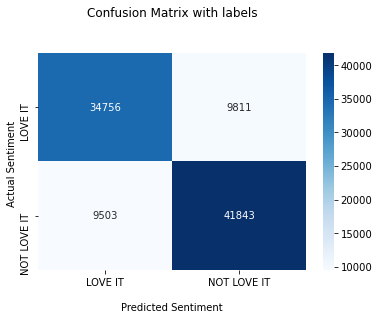

In [13]:
ax = sns.heatmap(cm, annot=True, cmap='Blues',fmt='g')
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Sentiment')
ax.set_ylabel('Actual Sentiment ');
ax.xaxis.set_ticklabels(['LOVE IT','NOT LOVE IT'])
ax.yaxis.set_ticklabels(['LOVE IT','NOT LOVE IT'])
plt.show()

In [21]:
# Hyperparameters Tune another instant of Linear Support Vector Classifier to see if we can get better result
c = np.arange(1,11)
lsvc_param = {'penalty':['l1','l2'],
              'loss': ['hinge', 'squared_hinge'],
              'C': c}
lsvc_param

{'penalty': ['l1', 'l2'],
 'loss': ['hinge', 'squared_hinge'],
 'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])}

In [22]:
lsvc_grid_cv = GridSearchCV(lsvc, param_grid=lsvc_param, cv=5, n_jobs=-1)

lsvc_grid_cv.fit(tfidf_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.79845457        nan 0.79274537        nan 0.79500274
        nan 0.7872098         nan 0.79214287        nan 0.78297131
        nan 0.78986971        nan 0.77977205        nan 0.78727558
        nan 0.77722528        nan 0.78526552        nan 0.77487845
        nan 0.78343173        nan 0.77271053        nan 0.78170581
        nan 0.77083465        nan 0.78014302        nan 0.76927185
        nan 0.77904064        nan 0.76768275]
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l1', 'l2']})

In [23]:
lsvc_grid_cv.best_params_

{'C': 1, 'loss': 'hinge', 'penalty': 'l2'}

In [24]:
pred_cv = lsvc_grid_cv.best_estimator_.predict(tfidf_test)

score = metrics.accuracy_score(y_test,pred_cv)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred_cv,labels=['LOVE IT','NOT LOVE IT'])
print(cm)

0.8015848794502384
[[34745  9239]
 [ 9615 41424]]


Slightly better acuracy and faster than LogisticRegressor Classifier.

In [15]:
# Using the Hyperparameters to train new instant of the Linear Support Vector Classifier with max_iteration set to 10000
lsvc_tfidf = LinearSVC(C=1, loss='hinge', penalty = 'l2',max_iter=10000)
lsvc_tfidf.fit(tfidf_train,y_train)
pred_cv_tfidf = lsvc_tfidf.predict(tfidf_test)

score = metrics.accuracy_score(y_test,pred_cv_tfidf)
print(score)
cm = metrics.confusion_matrix(y_test,pred_cv_tfidf,labels=['LOVE IT','NOT LOVE IT'])
print(cm)

0.8034155953833161
[[35169  9398]
 [ 9457 41889]]


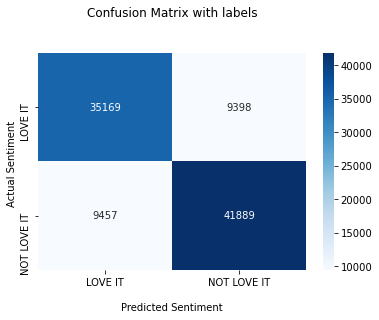

In [16]:
ax = sns.heatmap(cm, annot=True, cmap='Blues',fmt='g')
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Sentiment')
ax.set_ylabel('Actual Sentiment ');
ax.xaxis.set_ticklabels(['LOVE IT','NOT LOVE IT'])
ax.yaxis.set_ticklabels(['LOVE IT','NOT LOVE IT'])
plt.show()

In [34]:
# Creating the report for the final Linear Support Vector Classifier model
report = metrics.classification_report(y_test,pred_cv_tfidf)
print(report)

              precision    recall  f1-score   support

     LOVE IT       0.79      0.79      0.79     44567
 NOT LOVE IT       0.82      0.82      0.82     51346

    accuracy                           0.80     95913
   macro avg       0.80      0.80      0.80     95913
weighted avg       0.80      0.80      0.80     95913



Let's try some reviews and see how model works:

In [36]:
review = 'if you want to see a entertaining movie avoid this film by all means'
review = punc_clean(review)
review = lemmatize_text(review)
review = remove_stopword(review)
review = tfidf_vectorizer.transform([review])
lsvc_tfidf.predict(review)

array(['NOT LOVE IT'], dtype=object)

In [39]:
review = "can't be better than this, one of the best movie i ever saw"
review = punc_clean(review)
review = lemmatize_text(review)
review = remove_stopword(review)
review = tfidf_vectorizer.transform([review])
lsvc_tfidf.predict(review)

array(['LOVE IT'], dtype=object)

In [40]:
review = 'waste of the time and money'
review = punc_clean(review)
review = lemmatize_text(review)
review = remove_stopword(review)
review = tfidf_vectorizer.transform([review])
lsvc_tfidf.predict(review)

array(['NOT LOVE IT'], dtype=object)

Model has a good performance for obvious review. Let's check it with real and longer review from imdb.

In [41]:
# Real review for a movie that user gave 5/10 so model should lable it as NOT LOVE IT
review = "Unfortunately it is protracted and drawn out. Kudos for 'showing-not-telling', but there are so many stretches of uninteresting dialogue. Everybody plays their part well - the whole is less than the sum of the parts. Not sure why this is - the cast is strong with good actors I have enjoyed before. Perhaps it is the pretension of becoming the new 2001 overriding the need to make a compelling movie."
review = punc_clean(review)
review = lemmatize_text(review)
review = remove_stopword(review)
review = tfidf_vectorizer.transform([review])
lsvc_tfidf.predict(review)


array(['NOT LOVE IT'], dtype=object)

In [43]:
# Real long and complicated review with refrence to other movie. The user gave 6/10 so we excpect NOT LOVE IT.
review = "This is a movie with plenty of things going for it. Great performances, incredible visual effects, an interesting story, and tons of really cool concepts, which make for a few genuinely powerful scenes, However, that doesn't make it the flawless masterpiece of cinematic genius everybody is labeling it as. There are tons of people giving this movie 10/10 ratings, leading to a user rating of 8.7, and it is now #29 on the IMDb top 250. WOW! That is a lot of praise! On the top 250, Interstellar is above Casablanca, Raiders of the Lost Ark, Psycho, Apocalypse Now, and CITIZEN KANE! According to the users on IMDb, this movie's better than Citizen Kane, which has been known as possibly the greatest film of all time! Is is better than Citizen Kane? No, not even close. The film is full of flaws, the biggest being the runtime. I may never see this movie again because of how long it felt! It feels like a lot of scenes are unneeded, and were made just so the movie could be longer, because Christopher Nolan wanted to make it seem really epic. I'm sure if Nolan cut a huge chunk of the movie out, it would've been better. A film by Nolan that is better than this one is The Dark Knight, which has a somewhat long runtime, but it feels way shorter than it's runtime, and is extremely entertaining throughout. Interstellar is so long that it starts to really drag on and, at times, I began to just zone out.The film is also a bit too dramatic. The dialogue about how love conquers all seemed very unnecessarily corny, as well as a few other select scenes in the movie. However, some sequences were quite powerful, especially the ending, which, actually, was kind of creepy. The concept of time was very prominent throughout the film, and it lead to some pretty creative and powerful sequences.Overall, the film is recommended, but you should be warned that this movie was LOOOOOOOONG!!!!!!"
review = lemmatize_text(review)
review = remove_stopword(review)
review = tfidf_vectorizer.transform([review])
lsvc_tfidf.predict(review)

array(['NOT LOVE IT'], dtype=object)

In [44]:
# Another long review with 7/10 score so we excpect LOVE IT.
review = "Interstellar is set in the future where crop blights and dust storms threaten human survival and so a group of explorers travel through a newly discovered wormhole to find a suitable planet to sustain human life.It amazes me how Christopher Nolan manages to come up with ideas like this. I admire how ambitious he is with his projects and Interstellar may be his most ambitious project to date. Despite its very long runtime, Interstellar never drags and that's because of the astounding visuals and emotion he put into this story. This is, without a doubt, one of his best looking films. There are just some films that are meant to be watched on a large screen with speakers to gain the full experience and Interstellar is one of those films. I honestly couldn't tell which scenes had visual effects and which had practical effects. They both blend so well and seamlessly to create some insane and phenomenal visuals that I think will age extremely well. The cinematography is amazing and you really get a sense that what you're watching is an epic. The sound is equally fantastic and Hans Zimmer's score as usual is incredible. It's a much more eerie score than what I'm used to hearing from Hans Zimmer but I liked it and though it fit well with the scale and stakes of the story.I've always been a fan of Matthew McConaughey I really loved his work here. His entire character has a very emotional arc and I felt the relationship he had with his daughter. A particular scene where we see McConaughey break down is easily one of Nolan's most emotional moments that is sure to leave people crying. For a child performance, I thought Mackenzie Foy and Jessica Chastain did a great job playing his daughter. Anne Hathaway was also really good as well as Michael Caine. There was an actor who I didn't expect to see but was pleasantly surprised when he turned up. I do wish there was more to Casey Affleck and Timothée Chalamet. They both play the son of McConaughey but there was barely any development done to that character for me to care about him.Whilst Interstellar is a visual spectacle and portrays a heartfelt and emotional relationship really well, it's certainly not a perfect film. The dialogue isn't anything special and at times very cheesy especially with one monologue delivered by Hathaway. I'm also not completely sold on the ending. For this story and how high the stakes were, I felt the film wrapped up way too nicely.Despite my issues with Interstellar, I still think it's a solid and emotional film with terrific performances from everyone, some interesting concepts that I'll be pondering over and breathtaking visuals that will stand the test of time."
review = punc_clean(review)
review = lemmatize_text(review)
review = remove_stopword(review)
review = tfidf_vectorizer.transform([review])
lsvc_tfidf.predict(review)

array(['LOVE IT'], dtype=object)

In [46]:
# Save the model for later use.
pickle.dump(lsvc_tfidf,open('sentiment_model.sav','wb'))